For this exercise, general instructions were given:
1. Find an interesting topic and ask a research question.
2. Find at least two datasets from the web (public access) to visualize and prepare data.
3. Create the visualization (quite simple regarding coding but it had to be a good visualization following Cairo's principles of truthfulness, functionality, beauty and insightfulness).
4. State how you realized Cairo's principles in the visualization.
5. Write a justification of how your visualization addresses your stated research question.

Remarks:
1. Wikipedia was allowed as data source
2. The research question should include a specific city, region or country.

-------

Research question:

*Getting insights of the annual net generation of wind (offshore and onshore) and solar power in Germany with a focus on starting time, increase and amount by comparison to the other power generation types.*

Required imports - just pandas and matplotlib

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Two wikipedia pages were used as data sources. One for solar power and one for wind power.

1. https://de.wikipedia.org/wiki/Windenergie_in_Deutschland
Remark: the English wiki page for wind power in Germany (https://en.wikipedia.org/wiki/Wind_power_in_Germany) contains less detailed data and does not separate onshore and offshore for the investigated time interval.

2. https://en.wikipedia.org/wiki/Solar_power_in_Germany
Remark: the German wiki page for solar power in Germany (https://de.wikipedia.org/wiki/Photovoltaik_in_Deutschland) did not contain all the data for the investigated time interval.


In [2]:
#read csv data from wikipedia tables 
df_solar=pd.read_csv("SolarPowerGermany.csv", delimiter=";")
df_wind=pd.read_csv("WindenergieDeutschland.csv", delimiter=";")

In [3]:
#show data for an overview
print(df_solar.head())
print(df_wind.head())

   Year  Capacity (MW)  Net annual generation (GWh)  \
0  1990              2                            1   
1  1991              2                            1   
2  1992              6                            4   
3  1993              9                            3   
4  1994             12                            7   

  % of gross electricity consumption Capacity Factor (%)  
0                           2,00E-04             05. Jul  
1                           2,00E-04             05. Jul  
2                           7,00E-04             07. Jun  
3                           6,00E-04             03. Aug  
4                              0.001             06. Jul  
     Jahr Brutto-Stromverbrauch in TWh     Onshore-Windkraftanlagen  \
0     NaN                          NaN  Installierte Leistung in MW   
1  2022.0                            ?                        58077   
2  2021.0                            ?                        55958   
3  2020.0                      

In [4]:
#prepare solar data df
df_solar = df_solar[['Year', 'Net annual generation (GWh)']]
df_solar = df_solar.rename(columns={'Net annual generation (GWh)': 'Solar power'})
df_wind = df_wind.astype({'Year': 'int32', 'OnSolar power': 'int32'})
print(df_solar.head())

   Year  Solar power
0  1990            1
1  1991            1
2  1992            4
3  1993            3
4  1994            7


In [5]:
#prepare wind data df
df_wind.columns = pd.MultiIndex.from_arrays([df_wind.columns, df_wind.iloc[0].values])
df_wind.drop(index=df_wind.index[0], axis=0, inplace=True)
df_wind.columns = df_wind.columns.map('{0[0]}{0[1]}'.format) 
df_wind = df_wind.rename(columns={'Jahrnan': 'Year', df_wind.columns[3]:'Onshore wind power', df_wind.columns[8]:'Offshore wind power'})
df_wind = df_wind[['Year', 'Onshore wind power', 'Offshore wind power']]
df_wind = df_wind.astype({'Year': 'int32', 'Onshore wind power': 'int32', 'Offshore wind power': 'int32', 'Solar power': 'int32'})
print(df_wind.head())

     Year Onshore wind power Offshore wind power
1  2022.0             100164               25123
2  2021.0              90272               24375
3  2020.0             104796               27306
4  2019.0             101150               24744
5  2018.0              90484               19467


In [6]:
#merge both df in one df with onshore/offshore wind power and solar power for the given time interval using inner join.
df_power = pd.merge(df_wind, df_solar)
df_power = df_power.sort_values(by='Year', ascending=True)
df_power.set_index('Year', inplace=True)
print(df_power.head(10))
print(type(df_power))
print(df_power.dtypes)
print(df_power.shape)

      Onshore wind power  Offshore wind power  Solar power
Year                                                      
1990                  72                    0            1
1991                 102                    0            1
1992                 281                    0            4
1993                 612                    0            3
1994                 927                    0            7
1995                1530                    0            7
1996                2073                    0           12
1997                3025                    0           18
1998                4579                    0           35
1999                5639                    0           30
<class 'pandas.core.frame.DataFrame'>
Onshore wind power     int32
Offshore wind power    int32
Solar power            int32
dtype: object
(33, 3)


Comments on how the plot was created due to Cairo’s principles of truth, beauty, function, and insight.

Truthfullness: The visual graphic show all the data acquired in the research and there is data for each power generation type for each investigated year.

Beauty: The figure contains a title, x label, a detailed y label with the measured unit and a legend. The colors of the lines are given by the 'seaborn-v0_8' style to be easily distinguishable. The font sizes match the size of the figure.

Functionality: The graphic shows the development of the amounts of generated power per year over time. In order to identify the starting point of each power type and to easier compare the different power types, a grid structure was added. 

Insightfulness: The figure clearly gives answers to the given research question. It is easy to see the starting points, development and also compare the different energy production types.

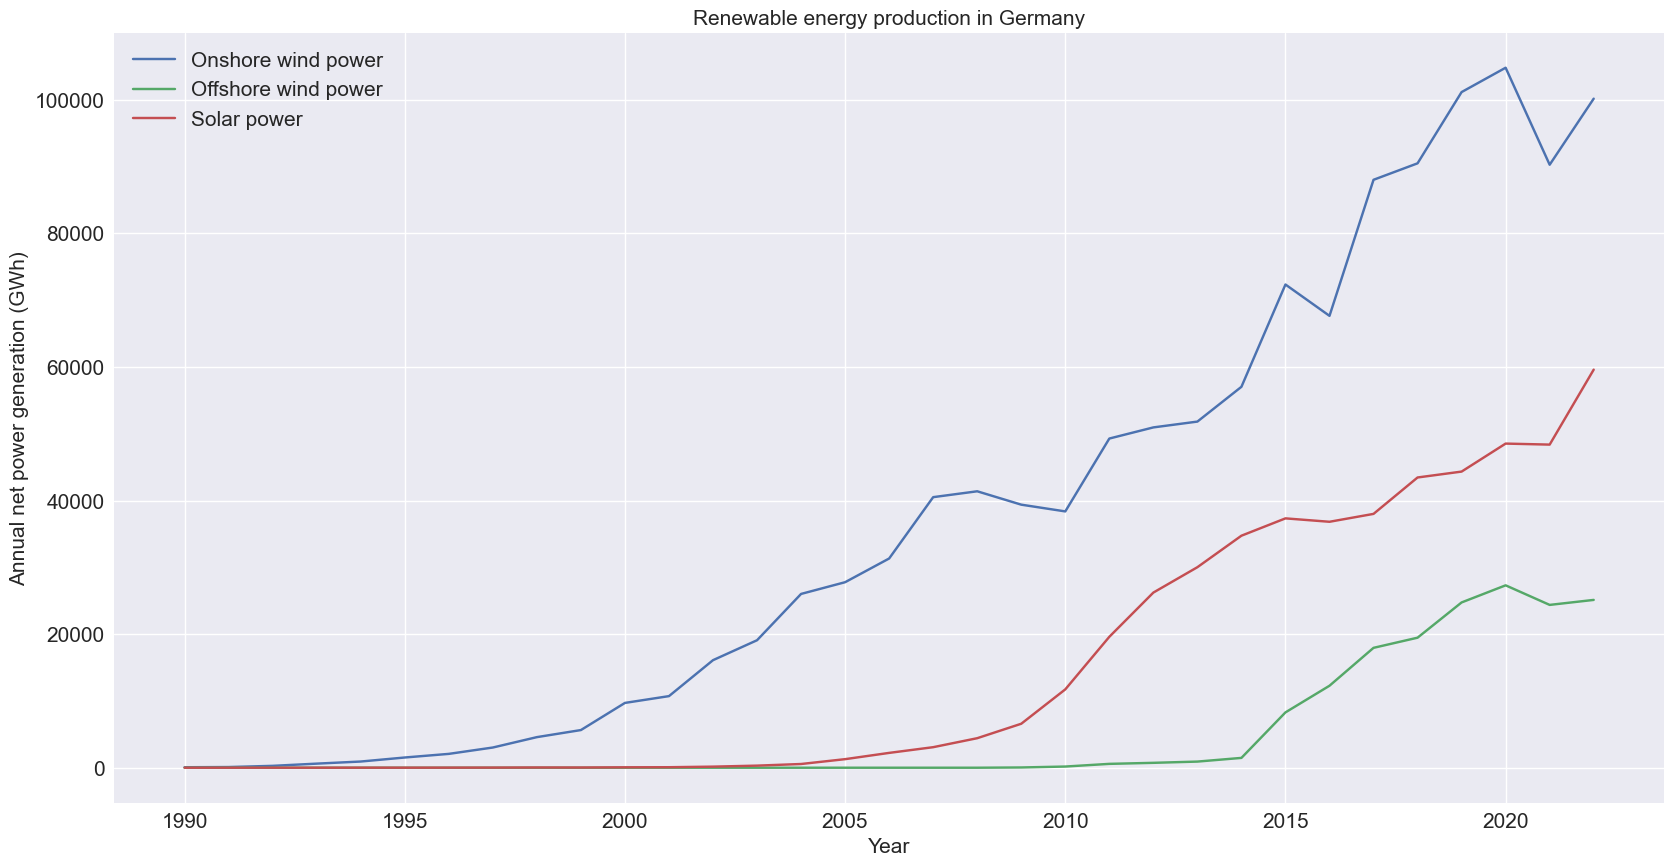

In [7]:
#plt data to answer research question
plt.style.use("seaborn-v0_8")

general_font_size = 15

ax = df_power.plot(figsize=(20, 10), fontsize=general_font_size, grid=True);

ax.set_ylabel('Annual net power generation (GWh)',fontdict={'fontsize':15});
ax.legend(fontsize=general_font_size);
ax.set_xlabel('Year', fontdict={'fontsize':general_font_size});
ax.set_title('Renewable energy production in Germany', fontdict={'fontsize':general_font_size});


Summary and conclusion:

The focus of the research question was on starting time, increase and amount (by comparison to the other power generation types) of wind (offshore and onshore) and solar power generation in Germany. The data was acquired from from wikipedia pages. Therefore both German and English wikipedia pages were used in order to get the maximum of the available data. 

The figure clearly shows that onshore wind power generation was used first (starting early 90s). Solar power started around 10 years later and offshore wind power around another 10 years later. After starting the power generation for each type, the increase was quite small in the first years and then increased considerable. Wind power generation seems to have decreased a bit in 2021 and 2022 but the overall trend for all types of renewable power generation is still increasing. At any given time, onshore wind power generation had the largest amount of generated power over solar power which has outperformed offshore wind power at any given time.  